In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.neighbors import NearestNeighbors

In [3]:
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pl      300 non-null    float64
 1   pw      300 non-null    float64
 2   sl      300 non-null    float64
 3   sw      300 non-null    float64
 4   id      300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


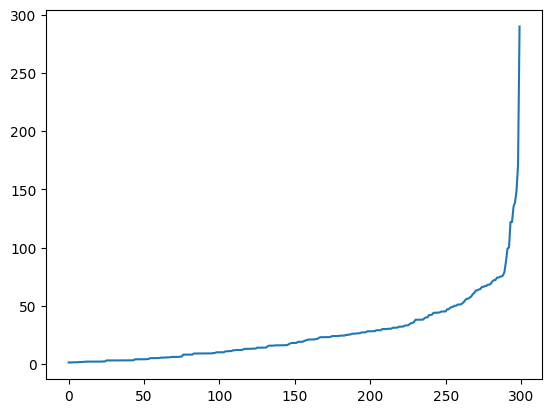

In [ ]:
# Plot k-distances (given from assignment)
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data,5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
